In [88]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from sys import path
path.append('/home/hernan-barquero/Desktop/Codigos/PhiS/Utilidades/Lagrange-a-Hamilton')

# Generación de los símbolos

Se generan la totalidad de simbolos a utilizar para el desarrollo del ejercicio

In [89]:
m1,m2,m3, G ,M,Ll= smp.symbols(r"m1,m2,m3, G,M,L", positive = True, real = True)

from sympy.physics.mechanics import dynamicsymbols , init_vprinting # Se utilizan estas funciones para tener notacion de Newton para las derivadas temporales y se generan 
                                                                    # las funciones con dependencia implicita a t

init_vprinting()

t = smp.Symbol("t", positive = True) # Tiempo
x1,y1,z1 , x2,y2,z2 , x3,y3,z3 = dynamicsymbols(r"x_1,y_1,z_1 , x_2,y_2,z_2 , x_3,y_3,z_3", real = True) 

dx1 = smp.diff(x1)
dy1 = smp.diff(y1)
dz1 = smp.diff(z1)

dx2 = smp.diff(x2)
dy2 = smp.diff(y2)
dz2 = smp.diff(z2)

dx3 = smp.diff(x3)
dy3 = smp.diff(y3)
dz3 = smp.diff(z3)

# Cantidades Físicas

Vectores de posición y velocidad, junto a la energía cinética y potencial del sistema.

También se conforma el Lagrangiano

In [90]:
r1 = smp.Matrix([x1,y1,z1])
r2 = smp.Matrix([x2,y2,z2])
r3 = smp.Matrix([x3,y3,z3])

v1 = smp.diff(r1)
v2 = smp.diff(r2)
v3 = smp.diff(r3)

vv1 = v1.dot(v1)
vv2 = v2.dot(v2)
vv3 = v3.dot(v3)

T = smp.Rational(1,2)*m1*vv1 + smp.Rational(1,2)*m2*vv2 + smp.Rational(1,2)*m3*vv3
V = -G*(m1*m2/((r1-r2).norm())+m1*m3/(r1-r3).norm() +m3*m2/(r3-r2).norm())

L = T - V

Obteniendo el Hamiltoneano del sistema

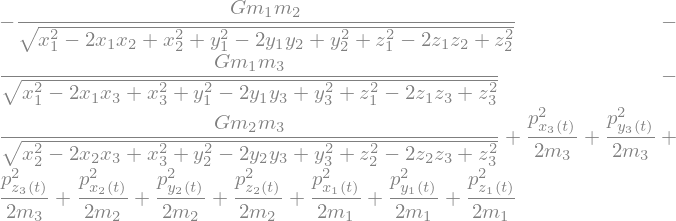

In [91]:
from lagrange_a_hamilton import cambio_L_H
coordenadas_generalizadas = [x1,y1,z1 , x2,y2,z2 , x3,y3,z3]

H, s_momentos_generalizados, momentos_generalizados = cambio_L_H(L,coordenadas_generalizadas)
H

In [92]:
ecuaciones_dq = []
for i in range(len(coordenadas_generalizadas)):
    aux = smp.diff(H,s_momentos_generalizados[i])
    ecuaciones_dq.append(aux)

qs = [x1,y1,z1 , x2,y2,z2 , x3,y3,z3]

ecuaciones_dp = []
for i in range(len(s_momentos_generalizados)):
    aux = -smp.diff(H, qs[i])
    ecuaciones_dp.append(aux)

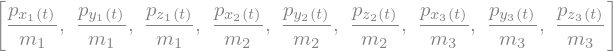

In [93]:
ecuaciones_dq

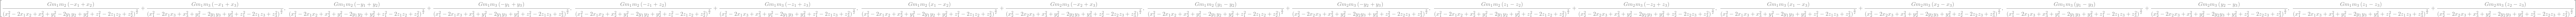

In [94]:
ecuaciones_dp

In [95]:
s_momentos_generalizados

In [96]:
px1 = s_momentos_generalizados[0]
py1 = s_momentos_generalizados[1]
pz1 = s_momentos_generalizados[2]

px2 = s_momentos_generalizados[3]
py2 = s_momentos_generalizados[4]
pz2 = s_momentos_generalizados[5]

px3 = s_momentos_generalizados[6]
py3 = s_momentos_generalizados[7]
pz3 = s_momentos_generalizados[8]

# Masa , longitudes y tiempos caracteristicos

Se va a definir ciertas masas, longitudes y tiempos caracteriscos para facilitar la implementacion en python.

$\bullet$ **Masa caracteristica:** Masa del Sol ($M_{sol} = 1,989 \times 10^{30} kg$)  $\Rightarrow$ $m'_{i} = \frac{m_{i} }{M}$ 

$\bullet$ **Longitud caracteristica :** Longitud promedio entre la Tierra y el Sol ($1 UA = 149. 597 .870 .700 m$) $\Rightarrow$ $\vec{r'}_{i} =\frac{\vec{r}}{L}$

$\bullet$ **Tiempo caracteristica :** $T = \left(\sqrt{\frac{GM_c}{L_c^3}}\right)^{-1}$ $\Rightarrow$ $t' = \frac{t}{T}$

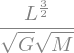

In [97]:
Tn = (smp.sqrt(G*M/Ll**3))**(-1)
Tn

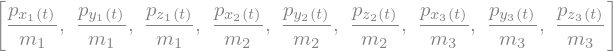

In [98]:
ecuaciones_dq_normalizadas = []

for i in range(len(ecuaciones_dq)):
	aux = ecuaciones_dq[i].subs([(m1,m1*M),(m2,m2*M),(m3,m3*M),(px1,px1*M*Ll/Tn),(py1,py1*M*Ll/Tn),(pz1,pz1*M*Ll/Tn),(px2,px2*M*Ll/Tn),(py2,py2*M*Ll/Tn),
								(pz2,pz2*M*Ll/Tn),(px3,px3*M*Ll/Tn),(py3,py3*M*Ll/Tn),(pz3,pz3*M*Ll/Tn)])*Tn/Ll
	aux1 = aux
	ecuaciones_dq_normalizadas.append(aux1)

ecuaciones_dq_normalizadas

0
1
2
3
4
5
6
7
8


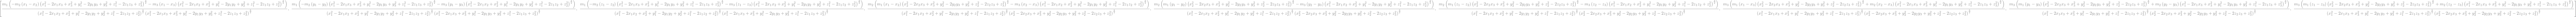

In [99]:
ecuaciones_dp_normalizadas = []

for i in range(len(ecuaciones_dp)):
    aux = ecuaciones_dp[i].subs([(m1,m1*M),(m2,m2*M),(m3,m3*M),(x1,x1*Ll), (y1,y1*Ll),(z1,z1*Ll),(x2,x2*Ll), (y2,y2*Ll),(z2,z2*Ll),(x3,x3*Ll), (y3,y3*Ll),(z3,z3*Ll)])*Tn**2 /(M*Ll)
    aux1 = aux.simplify()
    print(i)
    ecuaciones_dp_normalizadas.append(aux1)

ecuaciones_dp_normalizadas

Convirtiendo las expresiones anteriores a expresiones numericas

In [100]:
########################
dq1x_n = smp.lambdify([m1,px1],ecuaciones_dq_normalizadas[0])
dq1y_n = smp.lambdify([m1,py1],ecuaciones_dq_normalizadas[1])
dq1z_n = smp.lambdify([m1,pz1],ecuaciones_dq_normalizadas[2])

dp1x_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[0])
dp1y_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[1])
dp1z_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[2])

########################
dq2x_n = smp.lambdify([m2,px2],ecuaciones_dq_normalizadas[3])
dq2y_n = smp.lambdify([m2,py2],ecuaciones_dq_normalizadas[4])
dq2z_n = smp.lambdify([m2,pz2],ecuaciones_dq_normalizadas[5])

dp2x_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[3])
dp2y_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[4])
dp2z_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[5])

#########################
dq3x_n = smp.lambdify([m3,px3],ecuaciones_dq_normalizadas[6])
dq3y_n = smp.lambdify([m3,py3],ecuaciones_dq_normalizadas[7])
dq3z_n = smp.lambdify([m3,pz3],ecuaciones_dq_normalizadas[8])

dp3x_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[6])
dp3y_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[7])
dp3z_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[8])

In [101]:
def dSdt(t, S, m1, m2, m3):
    # Desempaquetar las variables de estado
    [q1x, q1y, q1z, p1x, p1y, p1z, 
    q2x, q2y, q2z, p2x, p2y, p2z, 
    q3x, q3y, q3z, p3x, p3y, p3z] = S

    # Calcular las derivadas para el cuerpo 1
    dq1x = dq1x_n(m1, p1x)
    dq1y = dq1y_n(m1, p1y)
    dq1z = dq1z_n(m1, p1z)
    dp1x = dp1x_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp1y = dp1y_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp1z = dp1z_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)

    # Calcular las derivadas para el cuerpo 2
    dq2x = dq2x_n(m2, p2x)
    dq2y = dq2y_n(m2, p2y)
    dq2z = dq2z_n(m2, p2z)
    dp2x = dp2x_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp2y = dp2y_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp2z = dp2z_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)

    # Calcular las derivadas para el cuerpo 3
    dq3x = dq3x_n(m3, p3x)
    dq3y = dq3y_n(m3, p3y)
    dq3z = dq3z_n(m3, p3z)
    dp3x = dp3x_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp3y = dp3y_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp3z = dp3z_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)

    # Retornar la lista de derivadas
    return [dq1x, dq1y, dq1z, dp1x, dp1y, dp1z, 
            dq2x, dq2y, dq2z, dp2x, dp2y, dp2z, 
            dq3x, dq3y, dq3z, dp3x, dp3y, dp3z]

# Sistema de estudio
Sol

Tierra

Luna

In [112]:
# Masas
Masa_sol = 1.989 * 10**30 # Esta es la masa caracteristica
Masa_Tierra = 5.972 * 10**24
Masa_Luna = 7.349 * 10**22

# Longitud caracteristica
UA = 149597870700

T_n = Tn.subs([(Ll,UA),(M,Masa_sol),(G,6.672 *10**(-11))]).evalf()


vel_Tierra_afelio = 29.29 *(1000/(UA/T_n)) 
vel_luna = 1*(1000/(UA/T_n))

In [120]:
t0 = 0
tf = 3600*24*365*10/T_n
n=round((tf-t0)/(3600*24/T_n))

t_n = np.linspace(t0,int(tf),n)


# Argumentos


m1_n = 1
m2_n = Masa_Tierra/Masa_sol
m3_n = Masa_Luna/Masa_sol

argumentos = [m1_n,m2_n,m3_n]

# Condiciones iniciales


q1x0 = 0
q1y0 = 0
q1z0 = 0

p1x0 = 0
p1y0 = 0
p1z0 = 0

#######################

q2x0 = 1
q2y0 = 0
q2z0 = 0

p2x0 = 0
p2y0 = vel_Tierra_afelio
p2z0 = 0

#######################

q3x0 = 1.0161*np.cos(0.000220501)
q3y0 = 0
q3z0 = 1.0161*np.sin(0.000220501)

p3x0 = 0
p3y0 = vel_luna
p3z0 = 0

condiciones_iniciales = [q1x0,q1y0,q1z0,p1x0,p1y0,p1z0, q2x0,q2y0,q2z0,p2x0,p2y0,p2z0, q3x0,q3y0,q3z0,p3x0,p3y0,p3z0]

In [121]:
from scipy.integrate  import solve_ivp


sol = solve_ivp(dSdt, t_span = (t0,tf), t_eval = t_n, y0 = condiciones_iniciales, args = argumentos)
pos = sol.y

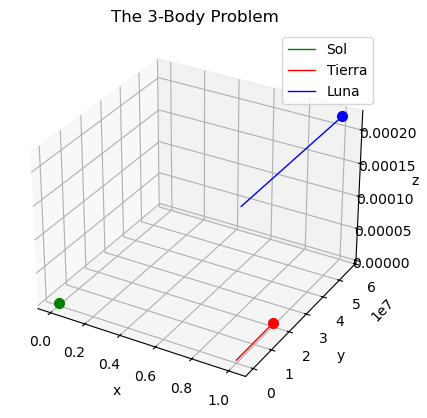

In [122]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
planet1_plt, = ax.plot(pos[0], pos[1], pos[2], 'green', label='Sol', linewidth=1)
planet2_plt, = ax.plot(pos[6],pos[7] ,pos[8] , 'red', label='Tierra', linewidth=1)
planet3_plt, = ax.plot(pos[12],pos[13] ,pos[14] , 'blue',label='Luna', linewidth=1)

planet1_dot, = ax.plot([pos[0][-1]], [pos[1][-1]], [pos[2][-1]], 'o', color='green', markersize=7)
planet2_dot, = ax.plot([pos[6][-1]], [pos[7][-1]], [pos[8][-1]], 'o', color='red', markersize=7)
planet3_dot, = ax.plot([pos[12][-1]], [pos[13][-1]], [pos[14][-1]], 'o', color='blue', markersize=7)


ax.set_title("The 3-Body Problem")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()
plt.legend()

plt.savefig("3_cuerpos.png")

KeyboardInterrupt: 

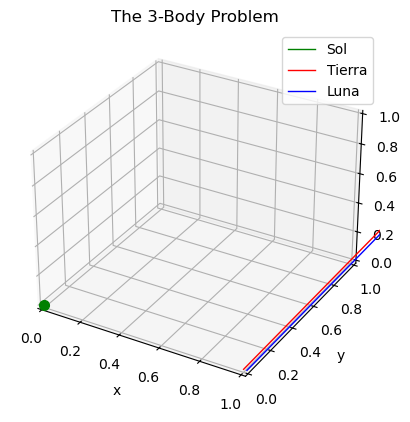

In [117]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Supongamos que pos es una lista con las posiciones en el tiempo, ya cargadas previamente.
# Cada sublista en pos tiene los valores en x, y, z para cada cuerpo en todos los tiempos.

# Crear la figura y el eje 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Configurar los límites y etiquetas
ax.set_title("The 3-Body Problem")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Inicializar las trayectorias y puntos
planet1_plt, = ax.plot([], [], [], 'green', label='Sol', linewidth=1)
planet2_plt, = ax.plot([], [], [], 'red', label='Tierra', linewidth=1)
planet3_plt, = ax.plot([], [], [], 'blue', label='Luna', linewidth=1)

planet1_dot, = ax.plot([], [], [], 'o', color='green', markersize=7)
planet2_dot, = ax.plot([], [], [], 'o', color='red', markersize=7)
planet3_dot, = ax.plot([], [], [], 'o', color='blue', markersize=7)

plt.legend()
plt.grid()

# Función de inicialización
def init():
    planet1_plt.set_data([], [])
    planet1_plt.set_3d_properties([])
    
    planet2_plt.set_data([], [])
    planet2_plt.set_3d_properties([])
    
    planet3_plt.set_data([], [])
    planet3_plt.set_3d_properties([])
    
    planet1_dot.set_data([], [])
    planet1_dot.set_3d_properties([])
    
    planet2_dot.set_data([], [])
    planet2_dot.set_3d_properties([])
    
    planet3_dot.set_data([], [])
    planet3_dot.set_3d_properties([])
    
    return planet1_plt, planet2_plt, planet3_plt, planet1_dot, planet2_dot, planet3_dot

# Función de animación
def animate(i):
    # Actualizar trayectorias
    planet1_plt.set_data(pos[0][:i], pos[1][:i])
    planet1_plt.set_3d_properties(pos[2][:i])

    planet2_plt.set_data(pos[6][:i], pos[7][:i])
    planet2_plt.set_3d_properties(pos[8][:i])

    planet3_plt.set_data(pos[12][:i], pos[13][:i])
    planet3_plt.set_3d_properties(pos[14][:i])

    # Actualizar los puntos de posición actual
    planet1_dot.set_data([pos[0][i]], [pos[1][i]])
    planet1_dot.set_3d_properties([pos[2][i]])

    planet2_dot.set_data([pos[6][i]], [pos[7][i]])
    planet2_dot.set_3d_properties([pos[8][i]])

    planet3_dot.set_data([pos[12][i]], [pos[13][i]])
    planet3_dot.set_3d_properties([pos[14][i]])

    return planet1_plt, planet2_plt, planet3_plt, planet1_dot, planet2_dot, planet3_dot

# Crear la animación
ani = FuncAnimation(fig, animate, frames=len(pos[0]), init_func=init, blit=True)

# Guardar como video si se necesita
ani.save("3_cuerpos_animacion.mp4", writer="ffmpeg", fps=30)